<a href="https://colab.research.google.com/github/politerishi/The-Spark-Foundation/blob/main/TASK_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The Sparks Foundation - Data Science & Business Analytics Internship


## TASK 2- Prediction using Unsupervised ML

## Author : RISHI KUMAR

### In this task we need to predict the optimum number of clusters and represent it visually.


In [ ]:
# import Necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
#to display all the graph in the workbook 
%matplotlib inline
sns.set_style("whitegrid",{'grid.linestyle': '--'})
import warnings
warnings.filterwarnings("ignore")


In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()

In [ ]:
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
# Dataset First Look
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
# Display the last 5 
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3
149,5.9,3.0,5.1,1.8


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
df.shape

(150, 4)

### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [ ]:
# Dataset Columns
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [ ]:
# Dataset Describe
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
sepal length (cm),150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal width (cm),150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal length (cm),150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal width (cm),150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


In [ ]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
len(df[df.duplicated()])

1

<Axes: ylabel='count'>

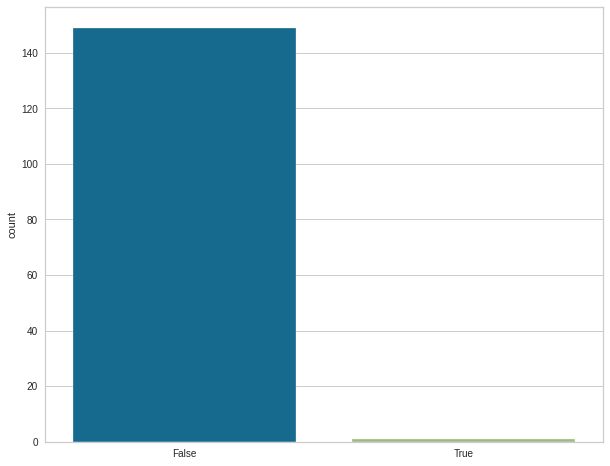

In [ ]:
# Visulizing                          #true means duplicate data
plt.figure(figsize=(10,8))
sns.countplot(x=df.duplicated())

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

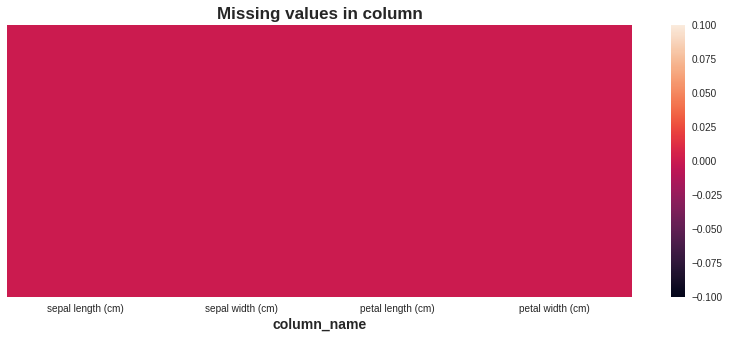

In [ ]:
# Visualizing the missing values
 # Checking Null Value by plotting Heatmap
plt.figure(figsize=(14, 5))
sns.heatmap(df.isnull(), cbar=True, yticklabels=False)
plt.xlabel("column_name", size=14, weight="bold")
plt.title("Missing values in column",fontweight="bold",size=17)
plt.show()

# Visualizing the dataset
# Exploratory Data Analysis(EDA)
EDA is an important step to build any machine learning project, it is an approach of analyzing datasets to summarize their main characteristics. With the help of EDA, we can able to take knowledge of features by just observing the plots and graphs.

So, here we will use some frequently used visualization techniques for observing data:

#Pair plot:
It plots a pairwise relationship in the dataset, it will create a grid of axis where the y-axis belongs to row and the x-axis belongs to columns

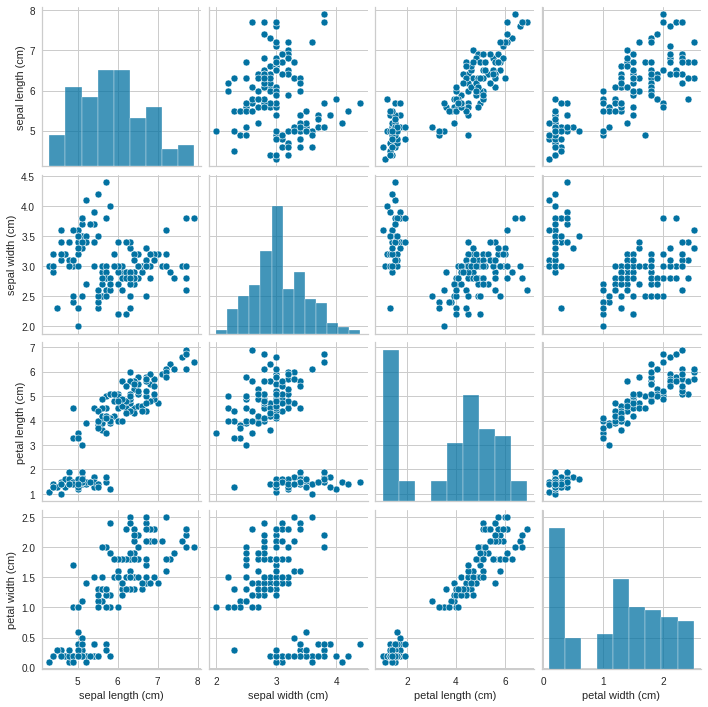

In [ ]:
# pairplot of dataframe
sns.pairplot( df )

<Axes: >

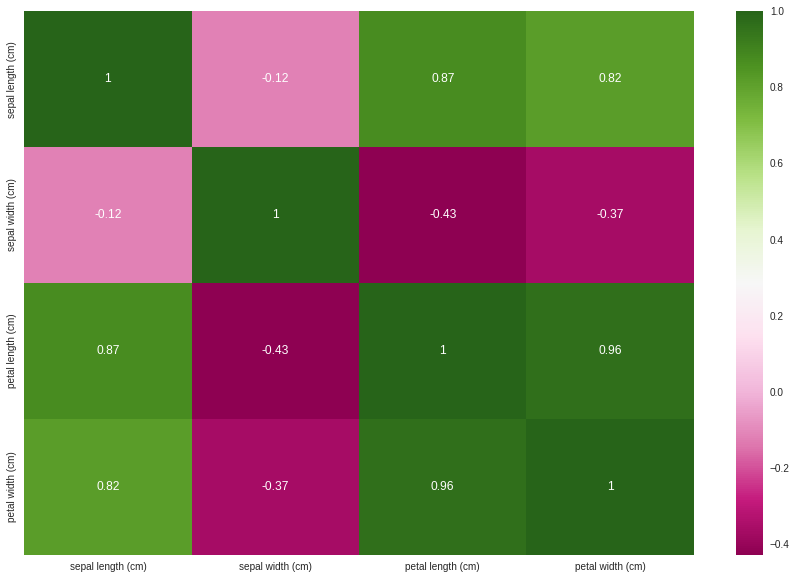

In [ ]:
# Correlation Heatmap visualization code
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),cmap='PiYG',annot=True)

# Standardizing data

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
data=sc.fit_transform(df)

In [ ]:
from sklearn.cluster import KMeans

# To find optimum number of clusters we use ELBOW METHOD

In [ ]:
wcss=[]
for k in range(1,11):
    km=KMeans(n_clusters=k,random_state=1)
    km.fit(data)
    wcss.append(km.inertia_)

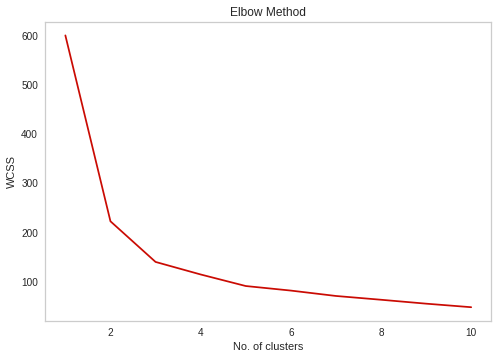

In [ ]:
plt.plot(range(1,11),wcss,color="r")
plt.title("Elbow Method")
plt.xlabel("No. of clusters")
plt.ylabel("WCSS")
plt.grid()
plt.show()

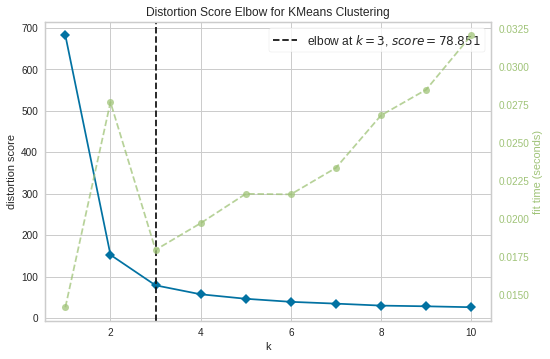

In [ ]:
from yellowbrick.cluster import KElbowVisualizer as ev
elbow=ev(km,k=range(1,11))
elbow.fit(df)
elbow.poof()
plt.show()

#### The optimum number of cluster is the one where the graph bends and WCSS doesn't decrease significantly after that point. Here  optimum value of k is 3

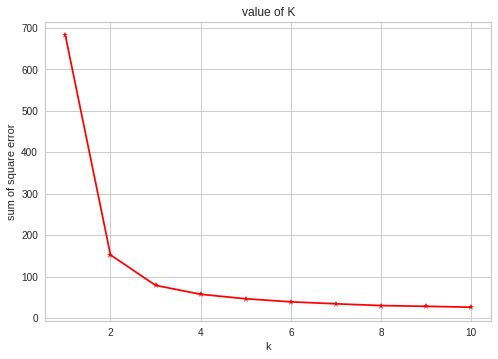

In [ ]:
# fitting the KMeans with using the value of k = 3
model = KMeans(n_clusters = 3 , random_state = 0)
y_means = model.fit_predict(x)
y_means

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

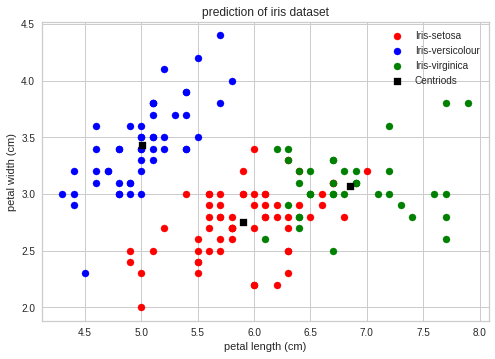

In [ ]:
plt.scatter(x[y_means == 0,0],x[y_means == 0,1],c = 'red', s= 50 , label = 'Iris-setosa')
plt.scatter(x[y_means == 1,0], x[y_means == 1 , 1] , c = 'blue' ,s=50, label = 'Iris-versicolour')
plt.scatter(x[y_means == 2,0] , x[y_means == 2,1] , c = 'green', s = 50 , label = 'Iris-virginica')
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1],marker = 's' , c = 'black' , label = 'Centriods')
plt.title("prediction of iris dataset")
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')


plt.legend()

This concludes the K-Means Clustering.